<a href="https://colab.research.google.com/github/Thiago-NovaesB/MestradoPuc.jl/blob/main/Computa%C3%A7%C3%A3oEvolucionaria%5CExerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 4

In [1]:
# https://deap.readthedocs.io/en/master/
# instalar pacote deap
!pip install deap
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
from deap import creator, tools, base, algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Questão 1

In [2]:
# dados de entrada
x = np.array([-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.0])
y = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

In [3]:
# função objetivo
def objective_function(individual):
  a = individual[0]
  b = individual[1]
  z = a*np.e**(b*x)
  return np.linalg.norm(z-y),

In [4]:
# Tipos da fitness e indivíduos
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [5]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real', random.gauss, 0, 10)

# Inicializar individuo e população
# initRepeat(container, func, n)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_real, 2)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [6]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.register('mate', tools.cxSimulatedBinaryBounded, eta=0, low=-10, up=10)  # eta, low, up
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [7]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [8]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg        	std        	min    	max        
0  	100   	1.96523e+11	1.79942e+12	12.8553	1.80543e+13
1  	57    	962527     	9.40628e+06	8.2398 	9.45501e+07
2  	62    	54.172     	51.4381    	6.11725	284.485    
3  	56    	35.4536    	54.2952    	7.52204	514.859    
4  	70    	19.7803    	18.4921    	6.84664	135.484    
5  	55    	11.1907    	4.44636    	6.42325	27.268     
6  	50    	12.3568    	25.7863    	4.6737 	263.188    
7  	58    	7.2045     	1.96482    	4.37268	15.8309    
8  	65    	9.14122    	21.823     	4.37268	220.566    
9  	51    	7.23794    	8.6882     	3.13919	71.7522    
10 	66    	4.79442    	0.5934     	3.13919	7.14539    
11 	56    	4.73947    	1.1455     	3.13919	10.5773    
12 	54    	5.38177    	3.7347     	3.13919	32.2174    
13 	40    	4.3585     	2.7219     	3.13919	26.1101    
14 	37    	3.61203    	0.492427   	3.13919	5.36623    
15 	51    	3.42653    	1.3171     	3.06855	16.1693    
16 	58    	3.76928    	3.28508    	3.06586	31.5541    
17 	57    

In [9]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [4.213117117333512, -2.1394191010188175]


In [10]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (3.0658130413832767,)


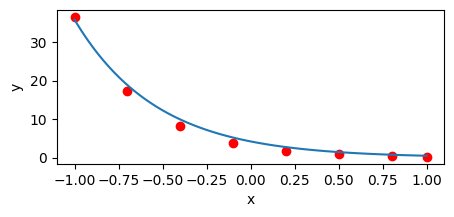

In [11]:
X = np.linspace(-1,1,100)
plt.figure(figsize=(5,2))
plt.plot(X, hof[0][0]*np.e**(hof[0][1]*X))
plt.scatter(x, y, color='red')  # melhor
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Questão 2

In [12]:
# função objetivo
def objective_function(individual):
  return 3*individual[0]+5*individual[1],

def feasible(individual):
  if (individual[0]+5)**2 + (individual[1]+5)**2 >= 25:
    return False
  if individual[0] > 4:
    return False
  if individual[1] > 6:
    return False
  if individual[0] < 0:
    return False
  if individual[1] < 0:
    return False
  if 3*individual[0] + 2*individual[1] > 18:
    return False
  return True

In [13]:
# Tipos da fitness e indivíduos
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [14]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real1', random.uniform, 0, 4)
toolbox.register('attr_real2', random.uniform, 0, 6)

# Inicializar individuo e população
toolbox.register('individual', tools.initCycle, creator.Individual, (toolbox.attr_real1, toolbox.attr_real2), 1)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [15]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, sys.maxsize))
toolbox.register('mate', tools.cxSimulatedBinaryBounded, eta=0, low=0, up=6)  # eta, low, up
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [16]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [17]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg        	std	min        	max        
0  	100   	9.22337e+18	0  	9.22337e+18	9.22337e+18
1  	52    	9.22337e+18	0  	9.22337e+18	9.22337e+18
2  	60    	9.22337e+18	0  	9.22337e+18	9.22337e+18
3  	50    	9.22337e+18	0  	9.22337e+18	9.22337e+18
4  	64    	9.22337e+18	0  	9.22337e+18	9.22337e+18
5  	57    	9.22337e+18	0  	9.22337e+18	9.22337e+18
6  	57    	9.22337e+18	0  	9.22337e+18	9.22337e+18
7  	68    	9.22337e+18	0  	9.22337e+18	9.22337e+18
8  	54    	9.22337e+18	0  	9.22337e+18	9.22337e+18
9  	51    	9.22337e+18	0  	9.22337e+18	9.22337e+18
10 	42    	9.22337e+18	0  	9.22337e+18	9.22337e+18
11 	55    	9.22337e+18	0  	9.22337e+18	9.22337e+18
12 	66    	9.22337e+18	0  	9.22337e+18	9.22337e+18
13 	57    	9.22337e+18	0  	9.22337e+18	9.22337e+18
14 	59    	9.22337e+18	0  	9.22337e+18	9.22337e+18
15 	57    	9.22337e+18	0  	9.22337e+18	9.22337e+18
16 	42    	9.22337e+18	0  	9.22337e+18	9.22337e+18
17 	48    	9.22337e+18	0  	9.22337e+18	9.22337e+18
18 	56    	9.22337e+18	0  	9.22

In [18]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [0.9497380917623932, 1.1881561043114657]


In [19]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (8.789994796844507,)


## Questão 3

In [20]:
# dados de entrada
x = np.array([-5.0, 2, 10])
y = np.array([10, 1, 5])

In [21]:
# função objetivo
def objective_function(individual):
  obj = 0
  for i in range(len(x)):
    obj += np.sqrt((x[i]-individual[0])**2 + (y[i]-individual[1])**2)
  return obj,

def feasible(individual):
  for i in range(len(x)):
    if (x[i]-individual[0])**2 + (y[i]-individual[1])**2 > 100:
      return False
  return True

In [22]:
# Tipos da fitness e indivíduos
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [23]:
toolbox = base.Toolbox()

# gerador da variável de decisão
toolbox.register('attr_real1', random.uniform, -5, 10)
toolbox.register('attr_real2', random.uniform, 1, 10)

# Inicializar individuo e população
toolbox.register('individual', tools.initCycle, creator.Individual, (toolbox.attr_real1, toolbox.attr_real2), 1)  

# População
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [24]:
# Operadores
toolbox.register('evaluate', objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, sys.maxsize))
toolbox.register('mate', tools.cxSimulatedBinaryBounded, eta=0.1, low=-5, up=10)  # eta, low, up
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

In [25]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)  # melhor de todo o processo
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [26]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, 
                                stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg        	std        	min    	max        
0  	100   	6.36413e+18	4.26575e+18	20.2124	9.22337e+18
1  	41    	3.22818e+18	4.39927e+18	20.2034	9.22337e+18
2  	53    	1.29127e+18	3.20039e+18	20.1881	9.22337e+18
3  	51    	7.3787e+17 	2.50224e+18	20.179 	9.22337e+18
4  	54    	2.76701e+17	1.57339e+18	20.139 	9.22337e+18
5  	65    	3.68935e+17	1.8074e+18 	20.139 	9.22337e+18
6  	60    	9.22337e+16	9.17714e+17	20.1445	9.22337e+18
7  	54    	2.76701e+17	1.57339e+18	20.1445	9.22337e+18
8  	51    	9.22337e+16	9.17714e+17	20.1321	9.22337e+18
9  	62    	20.1602    	0.0227859  	20.1365	20.359     
10 	55    	20.1498    	0.00631712 	20.1361	20.1701    
11 	64    	3.68935e+17	1.8074e+18 	20.1361	9.22337e+18
12 	46    	20.1409    	0.00513147 	20.1361	20.1774    
13 	57    	1.84467e+17	1.29127e+18	20.1326	9.22337e+18
14 	49    	20.1366    	0.00263067 	20.1207	20.1504    
15 	61    	1.84467e+17	1.29127e+18	20.1203	9.22337e+18
16 	44    	2.76701e+17	1.57339e+18	20.1132	9.22337e+18
17 	60    

In [27]:
# Melhor solução
print('Melhor indivíduo:', hof[0])

Melhor indivíduo: [2.513864665135032, 3.401469392889641]


In [28]:
# Resultado da fo do mlehor indivíduo:
print('Melhor F.O.:', objective_function(hof[0]))

Melhor F.O.: (20.110672540245794,)


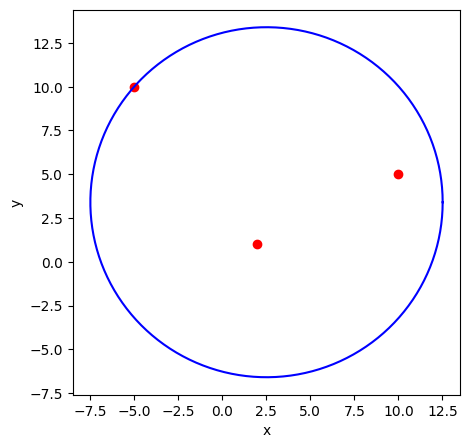

In [29]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 10
 
a = radius * np.cos( theta ) + hof[0][0]
b = radius * np.sin( theta ) + hof[0][1]

plt.figure(figsize=(5,5))
plt.plot(a, b, color='blue')
plt.scatter(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()